# IrisのデータをXGBoostで回帰分析

### 方針

- パッケージの読み込み
- データセットの読み込み
- クラス分類の時と変わってアヤメの種類をOne Hot表現にエンコードした。

- データセットを学習と評価用に分ける
- ハイパーパラメータ探索しつつ学習する
- 評価する（RMSE）
- 予測と実測の可視化
- 変数の重要度を可視化

In [1]:
import xgboost as xgb
from sklearn import datasets
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, mean_squared_error
import sklearn.preprocessing as sp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set(style="darkgrid")


In [2]:
# データセット読み込み

iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data)
iris_df = iris_df.rename(columns={
    0: 'sepal_length',
    1: 'sepal_width',
    2: 'petal_length',
    3: 'petal_width'})
iris_df['target'] = iris.target

# 数字のカテゴリをカテゴリ名に埋めなおしている
for i, name in enumerate(iris.target_names):
    iris_df['target'] = iris_df['target'].where(iris_df['target'] != i, name)
display(iris_df.head())


,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris_setosa=iris_df[iris_df.target=='setosa']

In [4]:
iris_setosa.shape

(50, 5)

In [5]:
iris_setosa.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


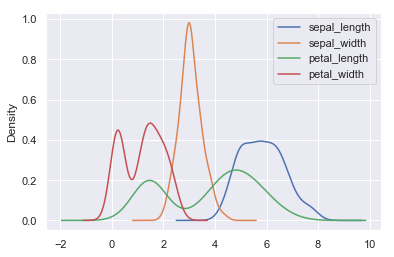

In [6]:
iris_df.plot(kind='density')

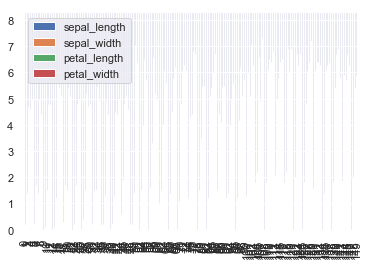

In [7]:
iris_df.plot(kind='bar')

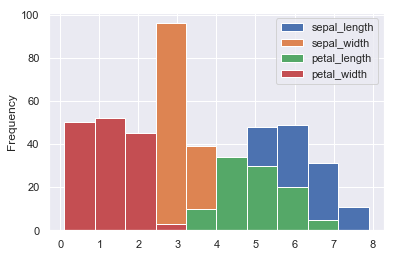

In [8]:
iris_df.plot(kind='hist')

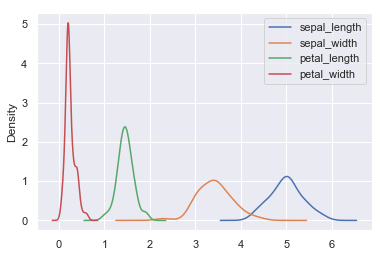

In [9]:
iris_setosa.plot(kind='density')

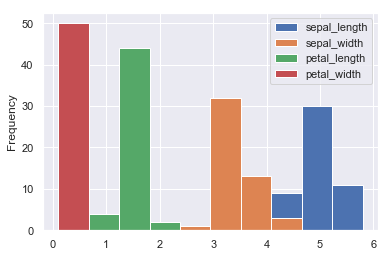

In [10]:
iris_setosa.plot(kind='hist')

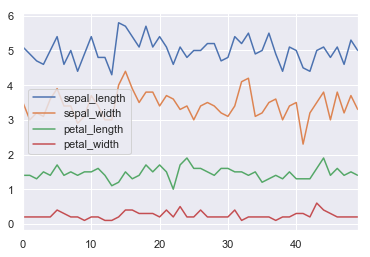

In [11]:
iris_setosa.plot(kind='line')

In [12]:
iris_setosa.iloc[:5]

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [13]:
iris_setosa.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
           dtype='int64')

In [14]:
iris_setosa.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target'], dtype='object')

In [15]:
# iris_setosa重回帰

X = iris_setosa.iloc[:,[1,2,3]]
y = iris_setosa.iloc[:,0]


#全要素が1の列を説明変数の先頭に追加,切片をつけるために必ず必要
X = sm.add_constant(X)

#モデルの設定
model = sm.OLS(y, X)

#回帰分析の実行
results = model.fit()

#結果の詳細を表示
results.summary()

/Users/iMac/Documents/Projects/python_venvs/py3.6.8/.venv/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sepal_length   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     20.76
Date:                Sun, 21 Apr 2019   Prob (F-statistic):           1.19e-08
Time:                        14:29:39   Log-Likelihood:                 3.0946
No. Observations:                  50   AIC:                             1.811
Df Residuals:                      46   BIC:                             9.459
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.3519      0.393      5.986      0.000       1.561       3.143
sepal_width      0.6548      0.092      7.083      0.000       0.469       0.841
petal_length     0.2376      0.208      1.142      0.259      -0.181       0.656
petal_width      0.2521      0.347      0.727      0.471      -0.446       0.950
==============================================================================
Omnibus:                        1.414   Durbin-Watson:                   2.377
Prob(Omnibus):                  0.493   Jarque-Bera (JB):                1.223
Skew:                           0.207   Prob(JB):                        0.543
Kurtosis:                       2.355   Cond. No.                         50.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
type(iris_setosa.iloc[:,0])

pandas.core.series.Series

In [17]:
# sepal_widthとsepal_lengthの単回帰をする

In [18]:
setosa_lw = iris_setosa.iloc[:,[0,1]]

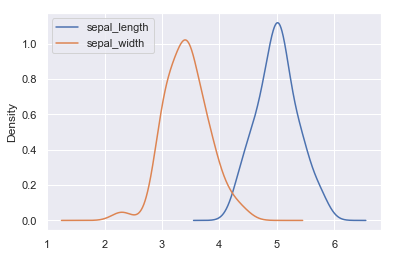

In [19]:
setosa_lw.plot(kind='density')

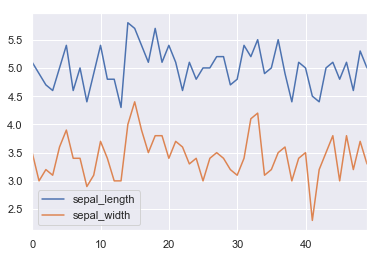

In [20]:
setosa_lw.plot()

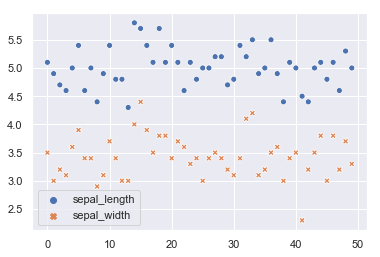

In [21]:
# こうしちゃうとただのラインとなにもかわらない
sns.scatterplot(data =setosa_lw)

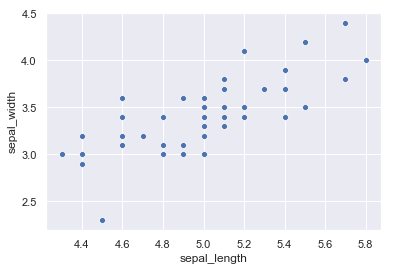

In [22]:
sns.scatterplot('sepal_length', 'sepal_width',data =setosa_lw)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


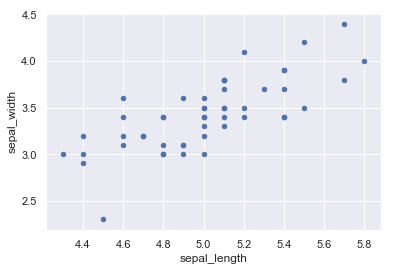

In [23]:
# DFも持ってた
setosa_lw.plot.scatter('sepal_length', 'sepal_width')

In [24]:
iris_setosa.sepal_length.iloc[:5]

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sepal_length, dtype: float64

In [25]:
iris_setosa.sepal_length.mean()

5.006

In [26]:
iris_setosa.sepal_width.mean()

3.428

In [27]:
iris_setosa.sepal_length.count()

50

In [28]:
iris_setosa.loc[:,'wid_dev'] = iris_setosa.sepal_width - iris_setosa.sepal_width.mean()

/Users/iMac/Documents/Projects/python_venvs/py3.6.8/.venv/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/iMac/Documents/Projects/python_venvs/py3.6.8/.venv/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [29]:
iris_setosa.iloc[:5]

,sepal_length,sepal_width,petal_length,petal_width,target,wid_dev
0,5.1,3.5,1.4,0.2,setosa,0.072
1,4.9,3.0,1.4,0.2,setosa,-0.428
2,4.7,3.2,1.3,0.2,setosa,-0.228
3,4.6,3.1,1.5,0.2,setosa,-0.328
4,5.0,3.6,1.4,0.2,setosa,0.172
